**MAPPING THE COSMIC EXPANSION**


Used NumPy, Pandas, Matplotlib, and SciPy to simulate galaxy distribution from redshift vs. distance data.

-------------------------------------

In [3]:
import sys
!{sys.executable} -m pip install scipy


     ---------------------------------------- 38.6/38.6 MB 2.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import scipy
print(scipy.__version__)

1.16.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import c
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# Constants
c_km_s = 299792.458  # Speed of light in km/s
H0 = 70  # Hubble constant in km/s/Mpc
MPC_TO_KM = 3.086e19

def hubble_distance(z):
    """Approximate comoving distance (in Mpc) assuming a flat universe and low z."""
    return c_km_s * z / H0

def hubble_velocity(z):
    """Approximate recession velocity (km/s) using Hubble's law."""
    return H0 * hubble_distance(z)

def hubble_distance_km(z):
    """Convert Hubble distance from Mpc to km."""
    return hubble_distance(z) * MPC_TO_KM

def km_to_mpc(km):
    """Convert km to Mpc."""
    return km / MPC_TO_KM

In [8]:
# Simulate redshift data
num_galaxies = 500
np.random.seed(42)
redshifts = np.random.uniform(0.01, 1.0, num_galaxies)
# Create a DataFrame to hold galaxy data
galaxy_data = pd.DataFrame({
    'z': redshifts,
    'distance_mpc': [hubble_distance(z) for z in redshifts],
    'velocity_kms': [hubble_velocity(z) for z in redshifts]
})

In [13]:
def hubble_distance_mpc(z):
    return hubble_distance(z) / 3.086e19


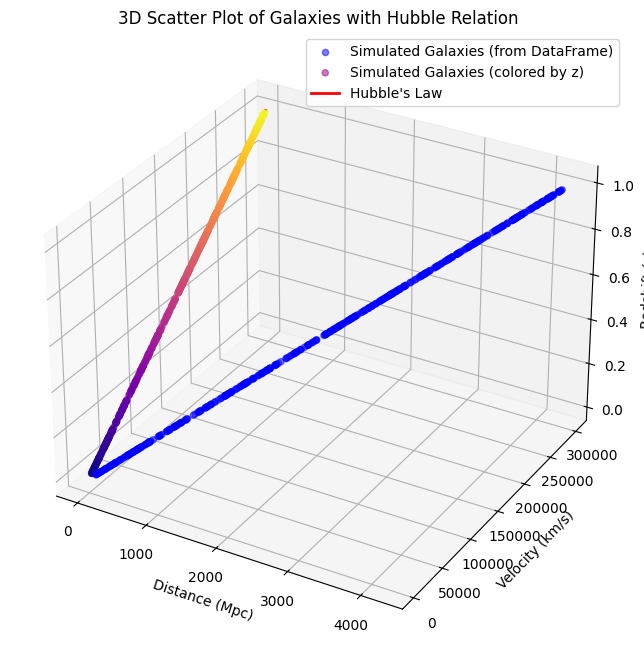

In [14]:

# Convert redshift to distance and velocity using Hubble's law
distances_mpc = np.array([hubble_distance_mpc(z) for z in redshifts])
velocities_kms = np.array([hubble_velocity(z) for z in redshifts])

# Create a 3D scatter plot of galaxies
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot simulated galaxy data from DataFrame
ax.scatter(
    galaxy_data['distance_mpc'],
    galaxy_data['velocity_kms'],
    galaxy_data['z'],
    c='blue',
    marker='o',
    alpha=0.5,
    label='Simulated Galaxies (from DataFrame)'
)

# Plot directly computed galaxy data (color-coded by redshift)
ax.scatter(
    distances_mpc,
    velocities_kms,
    redshifts,
    c=redshifts,
    cmap='plasma',
    marker='o',
    alpha=0.6,
    label='Simulated Galaxies (colored by z)'
)

# Overlay Hubble's Law theoretical line
z_vals = np.linspace(0.01, 1.0, 100)
d_vals = np.array([hubble_distance_mpc(z) for z in z_vals])
v_vals = np.array([hubble_velocity(z) for z in z_vals])
ax.plot(d_vals, v_vals, z_vals, color='red', linewidth=2, label="Hubble's Law")

# Axis labels and title
ax.set_xlabel('Distance (Mpc)')
ax.set_ylabel('Velocity (km/s)')
ax.set_zlabel('Redshift (z)')
ax.set_title('3D Scatter Plot of Galaxies with Hubble Relation')

# Legend and display
ax.legend()
plt.show()

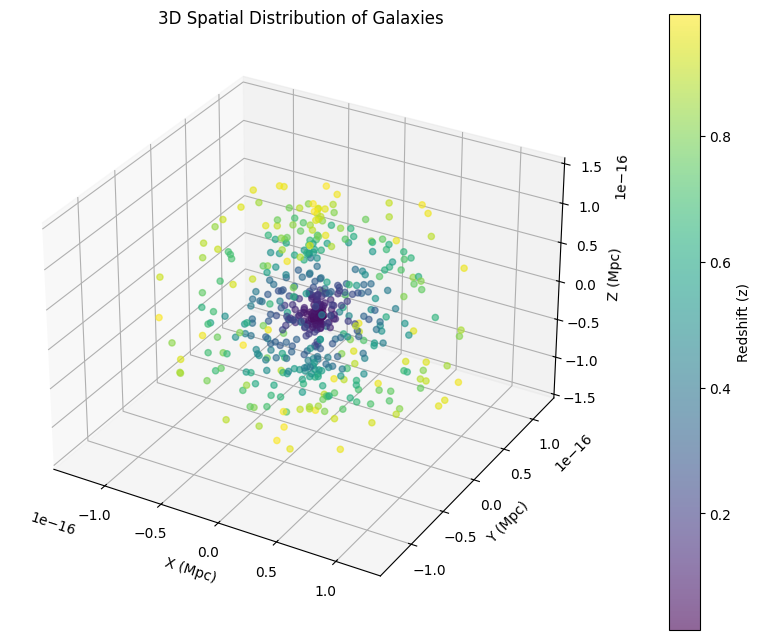

In [35]:
# Generate random spherical angles for galaxy positions
theta = np.random.uniform(0, np.pi, num_galaxies)       # 0 to π
phi = np.random.uniform(0, 2 * np.pi, num_galaxies)     # 0 to 2π

# Convert spherical coordinates (r = distance, theta, phi) to Cartesian (x, y, z)
x = distances_mpc * np.sin(theta) * np.cos(phi)
y = distances_mpc * np.sin(theta) * np.sin(phi)
z = distances_mpc * np.cos(theta)

# Plot 3D galaxy positions in Cartesian coordinates
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
scatter = ax2.scatter(x, y, z, c=redshifts, cmap='viridis', alpha=0.6, marker='o')

# Axis labels and title
ax2.set_xlabel('X (Mpc)')
ax2.set_ylabel('Y (Mpc)')
ax2.set_zlabel('Z (Mpc)')
ax2.set_title('3D Spatial Distribution of Galaxies')

# Add colorbar representing redshift
cbar = plt.colorbar(scatter, ax=ax2, pad=0.1)
cbar.set_label('Redshift (z)')
plt.show()



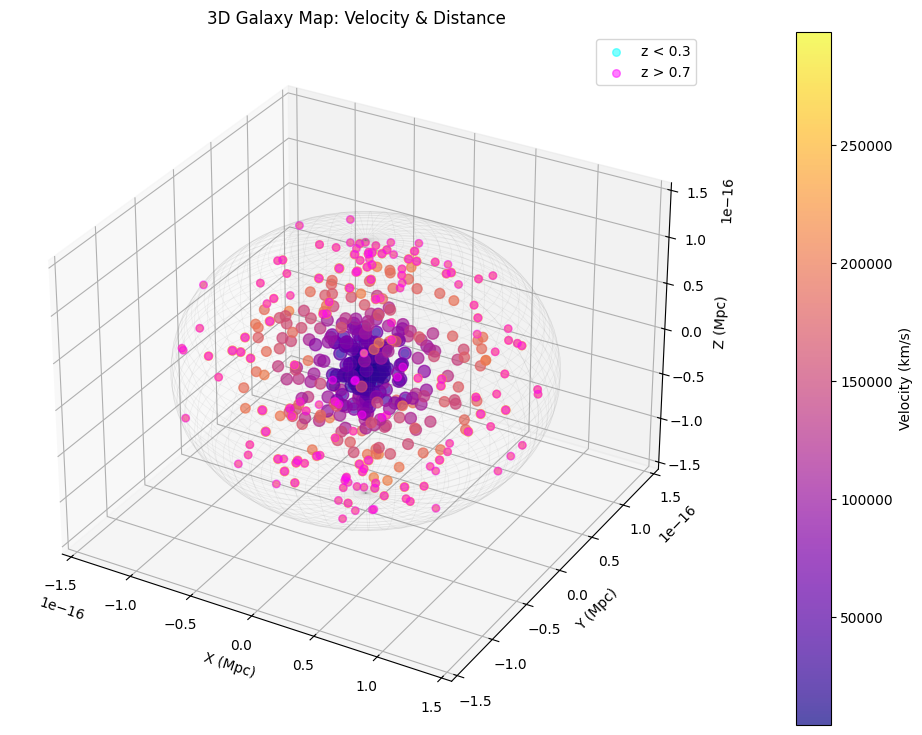

In [34]:
# Size galaxies by redshift ,far = small, near = big)
galaxy_sizes = np.interp(redshifts, (redshifts.min(), redshifts.max()), (100, 20))

# Create 3D scatter plot
fig3 = plt.figure(figsize=(12, 9))
ax3 = fig3.add_subplot(111, projection='3d')

# Plot galaxies with color = velocity and size = distance
scatter3 = ax3.scatter(x, y, z, c=velocities_kms, s=galaxy_sizes, cmap='plasma', alpha=0.7)

# Labels and title
ax3.set_xlabel('X (Mpc)')
ax3.set_ylabel('Y (Mpc)')
ax3.set_zlabel('Z (Mpc)')
ax3.set_title('3D Galaxy Map: Velocity & Distance')

# Add colorbar for velocity
cbar3 = plt.colorbar(scatter3, ax=ax3, pad=0.1)
cbar3.set_label('Velocity (km/s)')

# Highlight nearby (z < 0.3) and distant (z > 0.7) galaxies
ax3.scatter(x[redshifts < 0.3], y[redshifts < 0.3], z[redshifts < 0.3], c='cyan', s=30, alpha=0.5, label='z < 0.3')
ax3.scatter(x[redshifts > 0.7], y[redshifts > 0.7], z[redshifts > 0.7], c='magenta', s=30, alpha=0.5, label='z > 0.7')

# Add faint wireframe sphere (boundary)
u, v = np.linspace(0, 2 * np.pi, 50), np.linspace(0, np.pi, 50)
r_max = distances_mpc.max()
xs = r_max * np.outer(np.cos(u), np.sin(v))
ys = r_max * np.outer(np.sin(u), np.sin(v))
zs = r_max * np.outer(np.ones_like(u), np.cos(v))
ax3.plot_wireframe(xs, ys, zs, color='gray', linewidth=0.5, alpha=0.1)

ax3.legend()
plt.show()
